In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

_Final report: The final test score from the final catboost model is 0.820, with a training score of 0.829. We choose accuracy as the metric for assessment. We can observe that it is not overfitting or underfitting, and the gap between the test score and the training score is small. 0.82 is not bad, but we expect an accuracy higher than 0.9._

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# new added import
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_There are more than 20 features in the data set, except the ID feature, other features can relate to the result in the target. We can analyze the coefficients(weights) of different features that contribute to the prediction._

In [3]:
classification_df = pd.read_csv('data/UCI_Credit_Card.csv')

In [4]:
X = classification_df.drop(columns = ['default.payment.next.month'])
y = classification_df['default.payment.next.month']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         21000 non-null  int64  
 1   LIMIT_BAL  21000 non-null  float64
 2   SEX        21000 non-null  int64  
 3   EDUCATION  21000 non-null  int64  
 4   MARRIAGE   21000 non-null  int64  
 5   AGE        21000 non-null  int64  
 6   PAY_0      21000 non-null  int64  
 7   PAY_2      21000 non-null  int64  
 8   PAY_3      21000 non-null  int64  
 9   PAY_4      21000 non-null  int64  
 10  PAY_5      21000 non-null  int64  
 11  PAY_6      21000 non-null  int64  
 12  BILL_AMT1  21000 non-null  float64
 13  BILL_AMT2  21000 non-null  float64
 14  BILL_AMT3  21000 non-null  float64
 15  BILL_AMT4  21000 non-null  float64
 16  BILL_AMT5  21000 non-null  float64
 17  BILL_AMT6  21000 non-null  float64
 18  PAY_AMT1   21000 non-null  float64
 19  PAY_AMT2   21000 non-null  float64
 20  PA

_Explanation: We can know that there are 23 columns(features) in X_train and no column has NaN value._

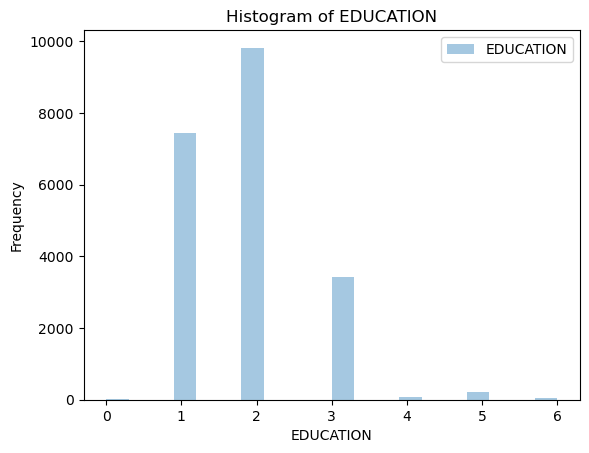

In [7]:
ax = X_train['EDUCATION'].plot.hist(bins=20, alpha=0.4, legend=True)
plt.xlabel('EDUCATION')
plt.title("Histogram of " + 'EDUCATION')
plt.show()

_Explanation: We can know that most examples' education level in training data are 1 or 2, a small part's education level are 3, few are 0, 4, 5, or 6._

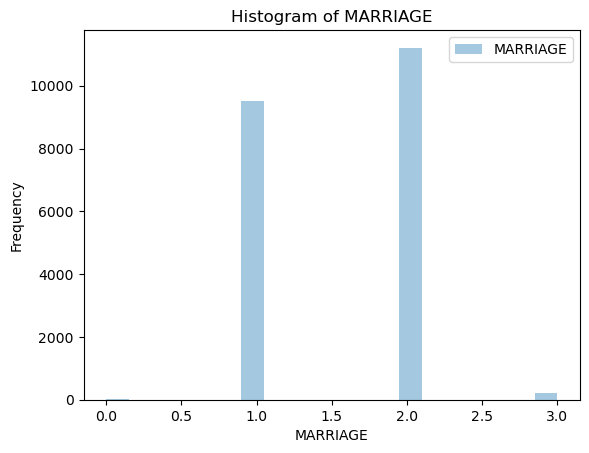

In [8]:
ax = X_train['MARRIAGE'].plot.hist(bins=20, alpha=0.4, legend=True)
plt.xlabel('MARRIAGE')
plt.title("Histogram of " + 'MARRIAGE')
plt.show()

_Explanation: Most examples' marriage status in the training data are 1 or 2, the number of 2 is more than that of 1, few are 0 and 3 that are ok to ignore._

In [9]:
X_train.duplicated().sum()

0

_Explanation: There is not a single duplicate value present in X_train._

In [10]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 21000 entries, 16395 to 19966
Series name: default.payment.next.month
Non-Null Count  Dtype
--------------  -----
21000 non-null  int64
dtypes: int64(1)
memory usage: 328.1 KB


_Explanation: There are total 21000 examples in the training data._

In [11]:
y_train.value_counts()

0    16312
1     4688
Name: default.payment.next.month, dtype: int64

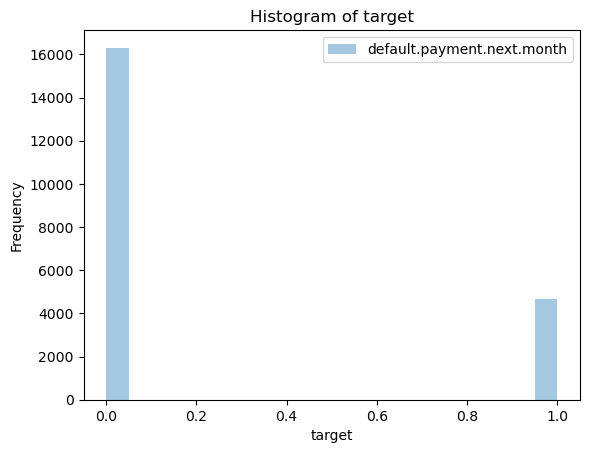

In [12]:
ax = y_train.plot.hist(bins=20, alpha=0.4, legend=True)
plt.xlabel('target')
plt.title("Histogram of " + 'target')
plt.show()

_Explanation: There are 16312 '0' and 4688 '1' in target_train where '1' means the person will fail to pay their credit card bills. '0' is almost 3 times more than '1'._

_Summary: There are total 23 features in the train set and no feature has a missing value. There are total 21000 examples and no duplicate examples in the train set. In target, 0 is much more than 1. The marriage feature is a categorical feature and the small proportion in value 0 and 3 can be ignored._

_Appropriate metric for assessment: accuracy._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [13]:
# identify different feature types
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['MARRIAGE']
drop_features = ['ID']

In [14]:
# generate different transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [15]:
# create a column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),   
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
    remainder = 'passthrough'
)

In [16]:
# fit_transform the training data
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
transformed_df

0         1         2         3         4         5         6   \
0      1.168355  0.054187 -0.300665 -0.293394 -0.265310 -0.371930 -0.494781   
1      2.090017 -0.597108 -0.685307 -0.679495  0.585444  1.970295  1.805461   
2     -0.060527  0.922579 -0.696132 -0.688319 -0.681234 -0.670935 -0.661045   
3     -0.367748 -0.597108  0.687456  0.752583  0.835581  0.918719  0.501203   
4     -0.905384  2.008070 -0.040230 -0.031399 -0.287429 -0.245237 -0.204599   
...         ...       ...       ...       ...       ...       ...       ...   
20995  1.629186  0.162736 -0.513226 -0.486648 -0.488648 -0.450259 -0.400085   
20996  1.475576  2.008070 -0.695886 -0.688067 -0.680974 -0.630868 -0.618584   
20997 -0.905384 -0.705657 -0.053288 -0.010446 -0.003381 -0.062716 -0.516534   
20998 -1.058995 -1.574049 -0.309066 -0.288478 -0.254590 -0.195023 -0.179691   
20999  1.552381  0.054187 -0.657925 -0.326854 -0.637415 -0.605175 -0.599674   

             7         8         9   ...   16   17   18   19   20   21   22  \
0     -0.587035 -0.039546 -0.040229  ...  1.0  0.0  2.0  1.0  0.0  0.0  0.0   
1      1.327534 -0.297166  3.739796  ...  1.0  0.0  2.0  1.0 -1.0 -1.0 -1.0   
2     -0.650908 -0.333097 -0.270403  ...  0.0  0.0  2.0  3.0 -2.0 -2.0 -2.0   
3      0.144527 -0.115517 -0.018028  ...  0.0  0.0  2.0  2.0  0.0  0.0  0.0   
4     -0.191104 -0.333097 -0.206185  ...  1.0  0.0  1.0  2.0  1.0  2.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
20995 -0.389539 -0.262410 -0.210772  ...  0.0  0.0  2.0  2.0  0.0  0.0  0.0   
20996 -0.534120 -0.333097 -0.270403  ...  0.0  0.0  2.0  1.0  1.0 -2.0 -2.0   
20997 -0.499414 -0.215559 -0.178663  ...  0.0  0.0  2.0  3.0  0.0  0.0  0.0   
20998 -0.372606 -0.215677 -0.178663  ...  1.0  0.0  2.0  2.0  0.0  0.0  0.0   
20999 -0.612175  1.181272 -0.132473  ...  0.0  0.0  2.0  1.0 -2.0 -2.0 -2.0   

        23   24   25  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2     -2.0 -2.0 -2.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
20995  0.0  0.0  2.0  
20996 -1.0  0.0 -1.0  
20997  0.0  0.0  0.0  
20998  0.0  0.0  0.0  
20999 -2.0 -2.0 -2.0  

[21000 rows x 26 columns]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [17]:
# create a dictionary to store all the results
results_dict = {}

In [18]:
# define the mean_std_cross_val_scores function
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
# generate the baseline model
dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

fit_time         score_time         test_score  \
dummy  0.026 (+/- 0.005)  0.010 (+/- 0.003)  0.777 (+/- 0.000)   

             train_score  
dummy  0.777 (+/- 0.000)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [22]:
# find the best C of logistic regression
# code adapted from lecture notes
scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for C in scores_dict["C"]:
    pipe_lr = make_pipeline(preprocessor, LogisticRegression(C=C, solver='lbfgs', max_iter=400))
    scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

C  mean_train_scores  mean_cv_scores
0       0.0001           0.780167        0.780095
1       0.0010           0.801583        0.801810
2       0.0100           0.809333        0.808714
3       0.1000           0.810321        0.809619
4       1.0000           0.810560        0.809714
5      10.0000           0.810571        0.809762
6     100.0000           0.810560        0.809810
7    1000.0000           0.810560        0.809810
8   10000.0000           0.810560        0.809810
9  100000.0000           0.810548        0.809810

_Explanation: the best C can be 100, 1000, or 10000 with the same highest mean_cv_score 0.809810 and the same mean_train_score 0.810560._

In [23]:
# report cross-validation scores
pipe_lr = make_pipeline(preprocessor, LogisticRegression(C=C, solver='lbfgs', max_iter=400))
scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True)
results = {}
results["Logistic Regression"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True
)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  0.350809    0.015336    0.808810     0.812500
1  0.255275    0.009281    0.809762     0.810536
2  0.251127    0.010258    0.810952     0.809762
3  0.326494    0.009006    0.813095     0.808810
4  0.232829    0.009566    0.806429     0.811131

In [24]:
std_scores = pd.DataFrame(scores).std()
std_scores

fit_time       0.051940
score_time     0.002639
test_score     0.002477
train_score    0.001396
dtype: float64

_Summary: We use logistic regression model to analyze and we find the best complexity hyperparameter C can be 100, 1000, or 10000 which have same the highest mean_cv_score 0.809810 and the same mean_train_score 0.810560. The best test_score of cross_validation is 0.813095 with train_score=0.808810, that there's not overfitting, not underfitting, and the gap between test_score and train_score is low._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [ ]:
# model 1: random forest
# code adapted from lecture notes
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)
pipe_rf.fit(X_train, y_train)
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True
)

In [ ]:
# model 2: catboost
# code adapted from lecture notes
from catboost import CatBoostClassifier
pipe_catboost = make_pipeline(
    preprocessor, CatBoostClassifier(verbose=0, random_state=123)
)
results["Catboost"] = mean_std_cross_val_scores(
    pipe_catboost, X_train, y_train, return_train_score=True
)

In [ ]:
# model 3: knn
# code adapted from lecture notes
from sklearn.neighbors import KNeighborsClassifier

# results_dict = {
#     "n_neighbors": [],
#     "mean_train_score": [],
#     "mean_cv_score": [],
#     "std_cv_score": [],
#     "std_train_score": [],
# }
# param_grid = {"n_neighbors": np.arange(1, 100, 10)}

# for k in param_grid["n_neighbors"]:
#     pipe_knn = make_pipeline(
#         preprocessor, KNeighborsClassifier(n_neighbors=k)
#     )
#     scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True)
#     results_dict["n_neighbors"].append(k)

#     results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
#     results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
#     results_dict["std_cv_score"].append(scores["test_score"].std())
#     results_dict["std_train_score"].append(scores["train_score"].std())

# results_df = pd.DataFrame(results_dict)
# results_df

# from results above, best n_neighbors is 51

pipe_knn = make_pipeline(
    preprocessor, KNeighborsClassifier(n_neighbors=51)
)
results["KNN"] = mean_std_cross_val_scores(
    pipe_knn, X_train, y_train, return_train_score=True
)
pd.DataFrame(results).T

_Observed from the score results, all other models KNN, Random forests, and Catboost seem to do a lot better than the linear model in terms of the test score. However, Random forests might be overfitting. If we are considering the fit and score time for all the models, the linear model is the fastest in terms of score time. Same for fit time, the models that have better test scores are much slower compared to the linear model._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [1, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
}

random_search_rf = RandomizedSearchCV(
    pipe_rf, param_distributions=param_grid, cv=5, n_jobs=-1, return_train_score=True
)
random_search_rf.fit(X_train, y_train) # all the work is done here
random_search_rf.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "catboostclassifier__n_estimators": [100, 200, 300],
    "catboostclassifier__max_depth": [3, 4, 5]
}
grid_search_cb = GridSearchCV(
    pipe_catboost, param_grid, cv=5, n_jobs=-1, return_train_score=True
)
grid_search_cb.fit(X_train, y_train) # all the work is done here
grid_search_cb.best_params_

In [ ]:
param_grid = {
    "kneighborsclassifier__n_neighbors": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
grid_search_knn = GridSearchCV(
    pipe_knn, param_grid, cv=5, n_jobs=-1, return_train_score=True
)
grid_search_knn.fit(X_train, y_train) # all the work is done here
grid_search_knn.best_params_

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

In [ ]:
import eli5

eli5.explain_weights(
    pipe_rf.named_steps["randomforestclassifier"], feature_names=feature_names
)

_Observed from the eli5 results, PAY_0 seems to be the most important feature for the random forest model._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

In [ ]:
pipe_best_catboost = make_pipeline(
    preprocessor, CatBoostClassifier(max_depth=3, n_estimators=300, verbose=0, random_state=123)
)
scores = cross_validate(pipe_best_catboost, X_train, y_train, return_train_score=True)
results["Final Catboost"] = mean_std_cross_val_scores(
    pipe_best_catboost, X_train, y_train, return_train_score=True
)
pd.DataFrame(scores)

_2. Yes, the scores agree with the validation scores from before. I do trust my results, because observing from the 5 scores, they do not differ very much from each other, the scores' max and min have a difference of 1.1%. And, the scores doesn't seem to be overfitting. No, I don't think I've had issues with optimization bias._

In [ ]:
import shap

pipe_best_catboost.fit(X_train,y_train)

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

shap_explainer = shap.TreeExplainer(pipe_best_catboost.named_steps["catboostclassifier"])
shap_values = shap_explainer.shap_values(X_test_enc)

# visualize the first prediction's explanation
shap.force_plot(shap_explainer.expected_value[1], shap_values[0,:], X_test_enc.iloc[0,:])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

In [ ]:
pd.DataFrame(results).T

_2. The best model for this problem is Catboost. Through hyperparameter optimization, we were able to find the best depth and n_estimator for our catboost model. In the end, our model achieve the test score of 0.820._

_3. I would want to try stacking and averaging on the models that we used above, in order to improve our model performance. If we have more time, we would also want to try and optimize other hyperparameters for the catboost model. And we would like to include other models such as decision tree and svm._

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Congratulations on finishing this project. This was a tricky one but you did it!

In [ ]:
from IPython.display import Image

Image("img/eva-well-done.png")